In [1]:
import numpy as np
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from benchmark_base import sample_main

In [2]:
sns.set_palette("viridis")

Run benchmark to evaluate performance across various problem sizes and evaporation rate of the ant system algorithm.

In [3]:
MAX_ITERATIONS = 100 # maximum number of iterations
NUMBER_OF_ANTS = 25 # number of ants in the system
INITIAL_PHEROMONE_VALUE = 1.0 # initial pheromone value for each edge
DISTANCE_INFLUENCE = 2.0 # influence of distance on route
PHEROMONE_INFLUENCE = 1.0 # influence of pheromone on route
PHEROMONE_DEPOSIT = 1.0 # pheromone deposit factor

Define base set of parameters for the Ant System Algorithm except evaporation_rate as we will change it throughout the benchmark. 

In [4]:
RUN_SAMPLES = 5 # run this many samples for each problem

data_list = []
for problem_size in ["SMALL", "MEDIUM", "LARGE"]:
    for EVAPORATION_RATE in [0.0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8]:
        average_samples = np.zeros((7)) # 7 parameters

        for run in range(RUN_SAMPLES):
            return_values = sample_main(problem_size, MAX_ITERATIONS, NUMBER_OF_ANTS, INITIAL_PHEROMONE_VALUE, DISTANCE_INFLUENCE, PHEROMONE_INFLUENCE, PHEROMONE_DEPOSIT, EVAPORATION_RATE) # evaluate the sample
            sample_array = np.array(return_values)
            average_samples += sample_array # add each sample to the average

        average_samples /= RUN_SAMPLES # divide by the number of samples to get the average

        data_list.append({'algorithm': 'Ant System', 'problem_size': problem_size.lower(), 'evaporation_rate': EVAPORATION_RATE, 'distance': average_samples[0], 'time_taken': average_samples[1]}) # append the ant system sample to data list

benchmark_df = pd.DataFrame(data_list) # create a dataframe from the data list

Run the benchmarks with changing rates and group it into a dataframe for visualization later.

Text(0.5, 1.0, 'Performance of Ant System vs. Evaporation Rate')

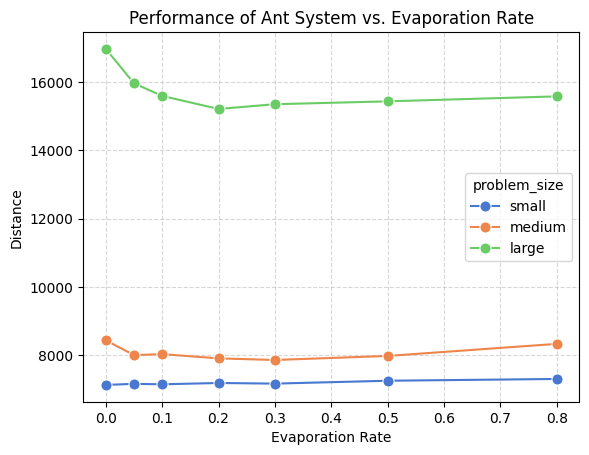

In [5]:
sns.lineplot(benchmark_df, x="evaporation_rate", y="distance", hue="problem_size", marker='o', markersize=8, palette="muted")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Evaporation Rate")
plt.ylabel("Distance")
plt.title("Performance of Ant System vs. Evaporation Rate")

Check performance across various evaporation rates and various problem sizes.